In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
df_norm = pd.read_excel("mots_result.xlsx", sheet_name="normal")
df_haze = pd.read_excel("mots_result.xlsx", sheet_name="haze")
df_haze
df_norm

,Model,Dataset,mMOTSA,mMOTSP,mIDF1
0,PCAN,Normal,27.8,66.9,44.9
1,UNICORN,Normal,28.1,67.2,44.5


  Model  Dataset mMOTSA  Norm  Difference
0  PCAN     0.01  23.0   27.8        -4.8
1  PCAN     0.02  22.2   27.8        -5.6
2  PCAN     0.06  13.7   27.8       -14.1


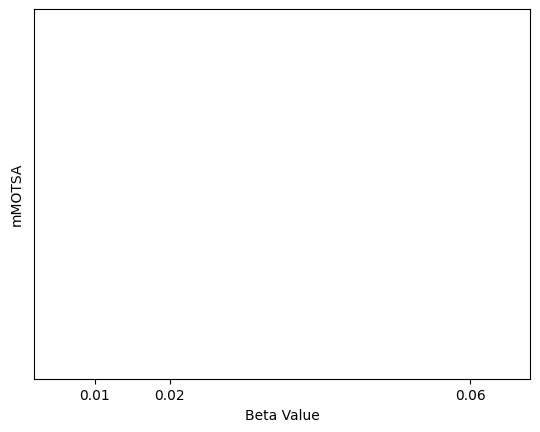

In [52]:
def comparision_graph(df,df_norm, model, metric):
    target_df = df[df["Model"]==model][["Model", "Dataset", metric]]
    target_df[metric] = target_df[metric].apply(lambda x:x.split("(")[0])
    norm_value = df_norm[df_norm["Model"]==model][metric][0]
    target_df["Norm"] = norm_value
    target_df["Difference"] = target_df[metric].astype(float) - target_df["Norm"]
    print(target_df)
    plt.bar(target_df["Dataset"], target_df[metric], width=0.01)
    plt.xticks(target_df["Dataset"])
    plt.ylabel(metric)
    ax = plt.gca()
    plt.ylim(10, 23.1)
    #ax.invert_yaxis()
    plt.xlabel("Beta Value")
    plt.show()
comparision_graph(df_haze, df_norm, "PCAN", "mMOTSA")

In [24]:
df_norm[df_norm["Model"]=="PCAN"]["mMOTSA"][0]

27.8